# Project: Wrangle and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#steps">Project Steps</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#viz">Analyzing and Visualizing Data </a></li>
<li><a href="#reports">Reporting</a></li>
</ul>

<a id='intro'></a>
## Introduction
<br>Data wrangling is a process where data is gathered from a variety of sources and in a variety of formats, assessed for quality and tidiness, and cleaned. Data wrangling prepares a dataset to perform analyses on and showcase visualizations of the findings.<br>
<br>The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. It has a unique rating system, which is a big part of the popularity of WeRateDogs.<br>
<br>WeRateDogs Twitter data is a large file. Assessing and cleaning the entire dataset completely would require a lot of time. Therefore, this project requires to assess and clean at least 8 quality issues and at least 2 tidiness issues. Python and its libraries are used to perform data wrangling, analyses, and visualizations in a Jupyter Notebook.<br>
<br>In this project, three datasets are explored.<br>
- **Enhanced Twitter Archive**
<br>This file contains basic tweet data for 5000+ of WeRateDogs tweets, among them, only 2356 filtered tweets with ratings are considered in this project.<br>
- **Image Predictions File**
<br>This file is present in each tweet according to a neural network. It has urls for images that can classify breeds of dogs. It also has image predictions and image number columns.<br>
- **Additional Data via the Twitter API**
<br>Retweet count and favorite count are two notable columns that were missing in Enhanced Twitter Archive. This additional data are gathered from Twitter's API.

<a id='steps'></a>
## Project Steps

The tasks in this project are as follows:
- Step 1: Gathering data
- Step 2: Assessing data
- Step 3: Cleaning data
- Step 4: Storing data
- Step 5: Analyzing, and visualizing data
- Step 6: Reporting i) data wrangling efforts and ii) data analyses and visualizations
         


<a id='wrangling'></a>
## Data Wrangling
In this section of the report, three pieces of data are gathered using three different methods. The datasets are then checked for cleanliness, trimmed, and cleaned for analysis. Each steps are documented and each cleaning decisions are justified. 

### Gathering Data
Using Python and its libraries, data is gathered from a variety of sources. The method required to gather each data is different. The first step of gathering data is importing various Python libraries.

In [126]:
# pandas and numpy are required for the overall data wrangling and analysis 
# matplotlib to produce visualizations
# requests and os libraries are imported to download image_predictions.tsv file programmatically
# time, json, tweepy, and OAuthHandler are imported to gather data for tweet_json.txt file
import pandas as pd
import numpy as np 
import requests 
import os 
import time
import json
import tweepy
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
%matplotlib inline 

#### Enhanced Twitter Archive
The twitter_archive_enhanced.csv file is downloaded manually from the given project resources. It is then uploaded to a Jupyter Notebook and read into a pandas DataFrame (named twitter).

In [5]:
# read WeRateDogs Twitter archive
twitter = pd.read_csv('twitter-archive-enhanced.csv')

#### Image Predictions File
The image_predictions.tsv file was hosted on Udacity's servers and it is downloaded programmatically using the Requests library and a given url. The file is saved on the computer and opened in wb or write binary mode. It is then read into a pandas DataFrame (named image).

In [31]:
# download the file in 'wrangle_act'
directory = 'wrangle_act'
if not os.path.exists(directory):
    os.makedirs(directory)
# the given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# actual bit of request code 
response = requests.get(url)

In [32]:
# save the file on the computer 
# open the file in wb mode 
with open(os.path.join(directory,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [81]:
# read Image Predictions File
image = pd.read_csv('wrangle_act/image-predictions.tsv', sep ='\t')

#### Additional Data via the Twitter API
Each tweet's retweet count and favorite count are gathered. Using the tweet IDs in the WeRateDogs Twitter archive, the Twitter API for each tweet's JSON data is queried with Python's Tweepy library. Then, each tweet's entire set of JSON data is stored in a file called tweet_json.txt file. The file is then read line by line into a pandas DataFrame (named tweet_list)

In [8]:
# twitter API keys, secrets, and tokens are required for quering data from Twitter API
# keys are not included in project submission
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
# tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter.tweet_id.values
len(tweet_ids)

2356

In [11]:
# query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()
# save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # this loop likely takes 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 230


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 637


Fail
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831:

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [94]:
# read tweet_json.txt file line by line into a pandas DataFrame 
tweet_list = pd.DataFrame(columns = ['tweet_id', 'favorite_count', 'retweet_count'])
with open ('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_list = tweet_list.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns = ['tweet_id', 'favorite_count', 'retweet_count']))
tweet_list = tweet_list.reset_index(drop = True)

## Assessing Data
After gathering all three pieces of data, visual and programmatic assessments are performed for quality (content issues) and tidiness (structural issues). In this process, 11 quality issues and 5 tidiness issues are detected and documented. Two types of assesments are conducted:<br>
<br>- **Visual assessment:** three of the tables - twitter, image, and tweet_list - are displayed to their entirety to get acquainted with the meaning of the datasets. Additionally, twitter-archive-enhanced.csv and image-predictions.tsv files are assessed in Google Sheets and tweet_json.txt file in text editor Atom.<br>
<br>- **Programmatic assessment:** pandas' functions and methods are used to assess the data.<br>

#### Visual Assessment

In [11]:
# display the twitter table 
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [96]:
# display the image table 
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
# display the tweet_list table 
tweet_list

,tweet_id,favorite_count,retweet_count
0,892420643555336193,7207,34592
1,892177421306343426,5409,29990
2,891815181378084864,3574,22567
3,891689557279858688,7426,37854
4,891327558926688256,7970,36145
...,...,...,...
2322,666049248165822465,37,92
2323,666044226329800704,119,253
2324,666033412701032449,38,103
2325,666029285002620928,41,116


`twitter` columns:
- **tweet_id:** the unique identifier for each twitter account
- **in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp:** the time when the tweet is created
- **source:** an utility used to post the Tweet, as an HTML-formatted string
- **text:** Tweets are also called status updates. Text is the actual UTF-8 text of the status update. 
- **retweeted_status_id**, **retweeted_status_user_id**,**retweeted_status_user_id**,**retweeted_status_timestamp:** these data are related to the retweets on Twitter.  Users can amplify the broadcast of Tweets authored by other users by retweeting . Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. 
- **expanded_urls:** The Expanded URL enrichment automatically expands shortened URLs that are included in the body of a Tweet, and includes the resulting URL as metadata within the payload
- **rating_numerator:** the numerators of the dog ratings. The numerators are almost always greater than 10, such as, 11/10, 12/10, 13/10, etc. This unique rating system has made WeRateDogs very popular worldwide.
- **rating_denominator:** the denominators of the dog ratings. These ratings almost always have a denominator of 10.
- **name:** dog names
- **doggo**, **floofer**, **pupper**, **puppo:** various stages of a dog's  life

`image` columns:
- **tweet_id:** the unique identifier for each twitter account. Tweet ID is the last part of the tweet URL after "status/" 
- **jpg_url:** url of the image associated with each tweet
- **img_num:** each tweet allows up to 4 images to attach. Image nuber in this case is not about how many images are being used rather which image (out of 4) is chosen by the algorithm for prediction
- **p1:** is the algorithm's #1 prediction for the image in the tweet
- **p1_conf:** is how confident the algorithm is in its #1 prediction
- **p1_dog:** is whether or not the #1 prediction is a breed of dog
- **p2_conf:** is how confident the algorithm is in its #2 prediction 
- **p2_dog:** is whether or not the #2 prediction is a breed of dog 
- **etc.**
<br>For each row, only top three predictions are included.<br> 

`tweet_list` columns:
- **tweet_id:** the unique identifier for each twitter account. Tweet ID is the last part of the tweet URL after "status/" 
- **favourite_count:** indicates approximately how many times this Tweet has been liked by Twitter users
- **retweet_count:** the number of times this Tweet has been retweeted

##### Quality Issues: Twitter Table
1. Columns in_reply_to_user_id and in_reply_to_tweet_id are not original tweets. We will only consider original tweet data in this project. Therefore, tweets which are not original, forms a quality issue.
2. Retweets are not original tweets. There are rows with values in the retweets columns (retweeted_status_id, retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp), which means those entries are retweets.
3. The name column contains some incorrect dog names, such as, 'a', 'the', 'None', etc.  

##### Tidiness Issues: Twitter Table
1. Text column not only contains text, but also ratings and urls. These values should be presented separately because multiple variables are stored in one column.
2. Rating numerators and rating denominators are displayed in two columns. It is violating the tidy data rule that the same variables are displayed in two separate columns.
3. Doggo, floofer, pupper, and puppo are different stages of a dog's life. These variables are dispersed under four different column headers. Moreover, there are rows where one dog has been assigned to mulitple dog stages. Therefore, each variable is not forming a column, which is a tidiness issue in a dataset. 

##### Quality Issues: Image Table
1. The tweet entries are stored in a reverse timestamp order (starting at 2015-11-15 and ending at 2017-08-01) compared to the twitter table and tweet_list table entries (starting at 2017-08-01 and ending at 2015-11-15).
2. P1, p2, and p3 column entries are a mix of title case and lower case.  
3. Some predictions in p1, p2, and p3 columns contain an underscore symbol in them, such as, miniature_pinscher, English_springer, etc., but others do not.

##### Tidiness Issues: Image Table
1. There are three columns(p1, p2, and p3) that contain data for dog breed prediction. This means each variable is not forming just one column, rather a single variable is stored in multiple columns. This is a tidiness issue. 

#### Other Observations
- According to tidy dataset rules, each type of observational unit forms a table. The image and tweet_list datasets are part of the same observational unit as the twitter dataset. But, they are displayed in three separate tables.
- No quality or tidiness issues are observed in tweet_list table in visual assessment.

#### Programmatic Assessment

- **Programmatic Assessment on twitter table**

In [213]:
# check the data type of twitter table  
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
# display the content of the first row of text column
twitter.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [30]:
# display the incorrect entries of name column
twitter.name[twitter.name.str[0]==twitter.name.str[0].str.lower()]

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [31]:
# find out how many occurances of none in name column
twitter.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Eugene       1
Bodie        1
Major        1
Monkey       1
Gerbald      1
Name: name, Length: 957, dtype: int64

In [17]:
# check out different numerator values in rating_numerator column
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [18]:
# check out different denominator values in rating_numerator column
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [72]:
# identify retweeted_status_id entries with non-null values 
twitter.retweeted_status_id.notna().value_counts()

False    2175
True      181
Name: retweeted_status_id, dtype: int64

In [75]:
# identify the non-null entries in in_reply_to_status_id column
twitter.in_reply_to_status_id.notna().value_counts()

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64

In [76]:
# identify the non-null entries in in_reply_to_user_id column
twitter.in_reply_to_user_id.notna().value_counts()

False    2278
True       78
Name: in_reply_to_user_id, dtype: int64

- **Programmatic Assessment on image table**

In [214]:
# check the data type of image table 
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- **Programmatic Assessment on tweet_list table**

In [215]:
# check the data type of tweet_list table 
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   object
 2   retweet_count   2327 non-null   object
dtypes: object(3)
memory usage: 54.7+ KB


##### Quality issues: twitter table
1. Tweet IDs are given in int64 data format instead of object.
2. Timestamp is given as object instead of datetime.
3. There are 109 incorrect entries in the name column. All incorrect names begin with a lowercase letter.
4. There are 745 occurances of the word none in the text column. Looks like entries with no dog names are listed as none in the name column.
5. The rating_numerator column contains values ranging from 0 to 1776. The rating_numerator data were not extracted correctly from the text column of the dataset.
6. Denominator values in rating_denominator range from 0 to 170. Particularly, a denominator value of 0 can produce incorrect calculations in data analyses. These denominator values were also extracted incorrectly as well. 
7. There are 78 non-null entries in in_reply_to_user_id and in_reply_to_tweet_id, which are not original tweets. 
8. The retweeted_status_id column contains 181 non-null entries, which means those entries are retweets.

##### Tidiness issues: twitter table
1. Text column contains texts, dog ratings, and urls. This means multiple variables are stored in one column.

##### Quality issues: image table
1. Tweet IDs are given in int64 data format instead of object.

##### Quality issues: tweet_list table
1. Favorite count and retweet count data are objects instead of int. 

## Cleaning Data
In this step, data cleaning is performed to solve the issues that were documented in the assessing section. The original datasets are copied to before performing any cleaning. All the necessary cleaning are done on the copied datasets. It prevents losing any original data while coding. In the cleaning process, a define-code-test framework is followed and every step is documented clearly. Finally, every piece of cleaned data is merged to create a high quality and tidy master pandas dataframe. 

### Define
Define section describes how each problematic data is cleaned using pandas functions and methods.

#### Cleaning Quality Issues: twitter table
1. The tweet_id column is converted to string/object.
2. The timestamp column is converted to datetime.
2. The rows with non-null values of retweeted_status_id column are deleted. This way, tweet_ids with retweets are removed from the dataset.
3. All incorrect dog names are replaced with nan values in the name column.
4. All missing values(i.e. None values) are replaced with nan in the name column.
5. Extaction of numerator and denominator values from the text column is performed. The ratio of numerator and denominator is calculated and checked for any outliers. The outliers are removed accordingly.
6. Retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id, and in_reply_to_tweet_id columns are dropped.

##### Cleaning Tidiness Issues: twitter table
1. The urls from the text column are extracted. There is already an expanded_urls column exists the table. Therefore, the new(extracted) urls are removed.
2.  Extaction of numerator and denominator values from the text column is performed. This creates two seperate columns for numerators and denominators, respectively. These two columns are combined into one by calculating the ratio, and a third column is formed. The third column is added to the twitter table.
3. The ratings from the text column are deleted. Now, the text column only contains text.
4. A new column is created to combine the four dog stages. Moreover, there are instances where a single tweet describes multiple dogs, hence, multiple stages of dog are assigned to one entry. These multiple stages are stored with commas. The original stages columns are dropped afterwards.

##### Cleaning Quality Issues: image table
1. The entire table is sorted and the index is reset to match the twitter and tweet_list tables index. 
2. Data type of tweet_id is converted to string/object.
3. P1, p2, and p3 columns are converted to title case in order to maintain a consistant styling of names through out the dataset.
4. Names with an underscore symbol in p1, p2, and p3 columns are modified with a space in them, again, to create an appropriate and consistant styling of names. 

##### Cleaning Tidines Issues: Image Table
1. P1, p2, and p3 columns are combined to a new column named 'perdiction' using a 'for' loop. The prediction column is then added to the image_clean table. 
2. P1, p2, p3, p1_dog, p2_dog, and p3_dog columns are dropped.

##### Cleaning Quality Issues: tweet_list table
1. Data type of favorite_count and retweet_count columns are converted to int from object.

##### Creating a  Master Dataframe
A master dataset is created combining all three cleanded tables. 

### Code
In the coding section, necessary functions and methods are applied to solve the quality and tidiness issues of the three datasets. After that, the twitter_clean, image_clean, and tweet_list_clean tables are merged to create a final table (named df_master).

##### Cleaning twitter table

In [297]:
# copy twitter_clean dataset
twitter_clean = twitter.copy()

In [298]:
# convert tweet_id to string 
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)

In [299]:
# conver timestamp to datetime
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

In [300]:
# filter retweet_status_id column to remove the non-null values 
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

In [301]:
# convert all incorrect lowercase names to nan
mask = twitter_clean.name.str.islower()
column = 'name'
twitter_clean.loc[mask, column] = np.nan

In [302]:
# handle missing values in name column
twitter_clean.name.replace('None', '', inplace=True)
twitter_clean.loc[twitter_clean.name == '', 'name'] = np.nan

In [303]:
# extract and remove urls from the text column
twitter_clean['text'] = twitter_clean['text'].str.replace('(https:\/\/\w+\.\w+\/\w+)', '')

<ipython-input-303-386f2c0035c5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_clean['text'] = twitter_clean['text'].str.replace('(https:\/\/\w+\.\w+\/\w+)', '')


In [304]:
# extract numerator and denominator values from text 
new_rating = twitter_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)
new_rating.columns = ['rating_numerators', 'rating_denominators']

In [305]:
# check the datatype of the rating table 
new_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rating_numerators    2175 non-null   object
 1   rating_denominators  2175 non-null   object
dtypes: object(2)
memory usage: 51.0+ KB


In [306]:
# convert the data type of rating table 
new_rating = new_rating.apply(pd.to_numeric)

In [307]:
# combine rating_numerators and rating_denominators into one column
new_rating['rating'] = new_rating['rating_numerators'] / new_rating['rating_denominators']

In [308]:
# reassess for outliers
new_rating.rating.value_counts()

1.200000      504
1.000000      444
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
1.350000        1
18.200000       1
0.975000        1
1.700000        1
177.600000      1
66.600000       1
0.950000        1
1.127000        1
0.733333        1
3.428571        1
1.250000        1
1.500000        1
0.818182        1
inf             1
0.636364        1
1.126000        1
Name: rating, dtype: int64

In [309]:
# keep only values less than 1.7 
new_rating.drop(new_rating[new_rating['rating']> 1.7].index, inplace = True)

In [310]:
# round up rating values to 1 decimal place 
new_rating.round({"rating":1})

,rating_numerators,rating_denominators,rating
0,13.0,10,1.3
1,13.0,10,1.3
2,12.0,10,1.2
3,13.0,10,1.3
4,12.0,10,1.2
...,...,...,...
2351,5.0,10,0.5
2352,6.0,10,0.6
2353,9.0,10,0.9
2354,7.0,10,0.7


In [311]:
# add the rating column to twitter_clean 
twitter_clean["rating"] = new_rating["rating"]

In [312]:
# delete ratings from the text column 
twitter_clean['text'] = twitter_clean['text'].str.replace('((?:\d+\.)?\d+)\/(\d+)','')

<ipython-input-312-c95d286b05ac>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_clean['text'] = twitter_clean['text'].str.replace('((?:\d+\.)?\d+)\/(\d+)','')


In [313]:
# clean doggo, floofer, pupper, and puppo columns 
# remove all None entries 
twitter_clean.doggo.replace('None', '', inplace=True)
twitter_clean.floofer.replace('None', '', inplace=True)
twitter_clean.pupper.replace('None', '', inplace=True)
twitter_clean.puppo.replace('None', '', inplace=True)

In [314]:
# create a new column to combine four dog stages 
twitter_clean['stage'] = twitter_clean['doggo']+ twitter_clean['floofer']+ twitter_clean['pupper']+ twitter_clean['puppo']

In [315]:
# handle multiple stages
twitter_clean.loc[twitter_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_clean.loc[twitter_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_clean.loc[twitter_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
# handle missing values
twitter_clean.loc[twitter_clean.stage == '', 'stage'] = np.nan

In [316]:
# drop the columns not need for analysis 
# keep only tweet_id, timestamp, text, expanded_urls, rating, name, and stage
drop_list = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating', 'name', 'stage']
twitter_clean.drop(twitter_clean.columns.difference(drop_list), axis=1, inplace=True)

##### Cleaning Image Table


In [332]:
# copy twitter_clean dataset
image_clean = image.copy()

In [333]:
# sort the entire table 
image_clean = image_clean.sort_index(ascending=False)

In [334]:
# reset the index
image_clean = image_clean.reset_index(drop = True)

In [336]:
# change tweet_id to string 
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

In [337]:
# store all the predictions in one column
dog_prediction = []
for i in range(len(image_clean)): 
    if image_clean['p1_dog'][i]==True:
        dog_prediction.append(image_clean.p1[i])
    elif image_clean['p2_dog'][i]==True:
        dog_prediction.append(image_clean.p2[i])
    elif image_clean['p3_dog'][i]==True:
        dog_prediction.append(image_clean.p3[i])
    else: 
        dog_prediction.append("no prediction")

In [338]:
# add a new column 
image_clean['dog_breed'] = dog_prediction

In [339]:
# convert dog_breed column entries to title case 
# replace the underscore with a space
image_clean[["dog_breed"]]= image_clean[["dog_breed"]].apply(lambda x:x.str.replace("_", " ").str.title(), axis = 1)

In [340]:
# drop the columns not need for analysis 
# keep only tweet_id, jpg_url, and dog_breed columns 
drop_list = ['tweet_id', 'jpg_url', 'dog_breed']
image_clean.drop(image_clean.columns.difference(drop_list), axis=1, inplace=True)

##### Cleaning tweet_list dataset

In [95]:
# copy to tweet_list_clean dataset
tweet_list_clean = tweet_list.copy()

In [98]:
# change data type from str to int
tweet_list_clean[['favorite_count', 'retweet_count']] = tweet_list_clean[['favorite_count', 'retweet_count']].astype(int)

##### The master file 

In [344]:
# merge twitter_clean and image_clean table to a new dataset called df_new
df_new = pd.merge(image_clean, twitter_clean, on='tweet_id', how='left')

In [345]:
# merge tweet_list_clean and df_new to create a new dataset called df_master
df_master = pd.merge(df_new, tweet_list_clean, on='tweet_id', how='left')

In [346]:
# reorder the columns 
df_master = df_master[["tweet_id", "timestamp", "text", "expanded_urls", "jpg_url", "name", "dog_breed", "stage", "rating", "favorite_count", "retweet_count"]]

### Test
In this step, the codes written in the code section are tested to check if all issues are solved. The final look of the master dataframe is also checked. The master dataset is then stored to a csv file (named twitter_archive_master.csv). 

#### Testing twitter_clean table

In [320]:
# check the data types
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2175 non-null   object             
 1   timestamp      2175 non-null   datetime64[ns, UTC]
 2   text           2175 non-null   object             
 3   expanded_urls  2117 non-null   object             
 4   name           1391 non-null   object             
 5   rating         2168 non-null   float64            
 6   stage          344 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 200.5+ KB


In [321]:
# check unique names 
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [264]:
# check the null values 
twitter_clean.name.isnull().sum()

784

In [268]:
# check one text column entry for the content
twitter_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  "

In [269]:
# check the rating column for the outliers
twitter_clean.rating.value_counts()

1.200000    504
1.000000    444
1.100000    431
1.300000    307
0.900000    156
0.800000     98
0.700000     53
1.400000     43
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
0.000000      2
1.350000      1
0.975000      1
1.700000      1
0.950000      1
1.127000      1
0.733333      1
1.250000      1
1.500000      1
0.818182      1
0.636364      1
1.126000      1
Name: rating, dtype: int64

In [270]:
# check the stage column for multiple values 
twitter_clean.stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

In [322]:
# display the final table
twitter_clean

,tweet_id,timestamp,text,expanded_urls,name,rating,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,0.5,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,0.6,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,0.9,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,0.7,NaN


##### Observations
1. The table has now only 7 columns.
2. Data type of tweet_id column is object.
3. Data type of timestamp is datetime. 
4. The total of 181 retweets are deleted. Therefore, all 2175 entries are original tweets.
5. All the lower case names and missing names(or None entries) have become nan values. 
6. The text column does not have any url or rating in it, and only contains texts.
7. All ratings are between 0 and 1.7. There are no unrealistic values anymore.
8. There is just one column in the table for dog stages. And, multiple stages are stored in cells with commas in between.

#### Testing image_clean table

In [341]:
# check the data type of the table 
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2075 non-null   object
 1   jpg_url    2075 non-null   object
 2   dog_breed  2075 non-null   object
dtypes: object(3)
memory usage: 48.8+ KB


In [342]:
# check the dog_breed column
image_clean.dog_breed

0                No Prediction
1                    Chihuahua
2                    Chihuahua
3           Labrador Retriever
4                       Basset
                 ...          
2070        Miniature Pinscher
2071       Rhodesian Ridgeback
2072           German Shepherd
2073                   Redbone
2074    Welsh Springer Spaniel
Name: dog_breed, Length: 2075, dtype: object

In [343]:
# display the final table 
image_clean

,tweet_id,jpg_url,dog_breed
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,No Prediction
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
...,...,...,...
2070,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher
2071,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback
2072,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd
2073,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone


##### Observations
1. Tweet_id column datatype is now object.
2. The table has only three columns now.
3. All dog predictions are now store in one column.
4. The breeds are all title case with spaces in between instead of the underscore symbols. 

#### Testing tweet_list_clean table

In [283]:
# check data types of the table 
tweet_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   int32 
 2   retweet_count   2327 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.5+ KB


##### Observations
1. Favorite_count and retweet_counts columns are now int32, not objects anymore. 

#### Testing df_master table

In [347]:
# display df_master
df_master

,tweet_id,timestamp,text,expanded_urls,jpg_url,name,dog_breed,stage,rating,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas,No Prediction,NaN,1.3,7207.0,34592.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly,Chihuahua,NaN,1.3,5409.0,29990.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie,Chihuahua,NaN,1.2,3574.0,22567.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Darla,Labrador Retriever,NaN,1.3,7426.0,37854.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Franklin,Basset,NaN,1.2,7970.0,36145.0
...,...,...,...,...,...,...,...,...,...,...,...
2070,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,NaN,Miniature Pinscher,NaN,0.5,37.0,92.0
2071,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,NaN,Rhodesian Ridgeback,NaN,0.6,119.0,253.0
2072,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,NaN,German Shepherd,NaN,0.9,38.0,103.0
2073,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,NaN,Redbone,NaN,0.7,41.0,116.0


##### Observations
1. The master dataframe contains 11 columns.
2. After merging the three tables, the number of rows in df_master becomes 2075. That means, the master file contains only tweets with jpg urls (same as the image_clean table).

In [349]:
# store data to csv file 
df_master.to_csv('twitter_archive_master.csv', index=False)

<a id='viz'></a>
# Analyzing and Visualizing Data
In the analyzing and visualizing data section of the project, three separate insights are generated with visualizations. Also, the data used to produce the visualizations are clearly documented. 

### Insight 1: **Which dog is the most popular?**

In [351]:
# identify the highest number of likes
df_master.favorite_count.max()

72901.0

In [353]:
# identify the highest number of retweets 
df_master.retweet_count.max()

148415.0

In [352]:
# locate the tweet_id with with the highest favorite count
df_master.loc[df_master['favorite_count']==72901.0]

,tweet_id,timestamp,text,expanded_urls,jpg_url,name,dog_breed,stage,rating,favorite_count,retweet_count
853,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,NaN,Labrador Retriever,doggo,1.3,72901.0,148415.0


In the WeRateDog Twitter account, each tweet receives numerous likes which is termed as favorite counts. Moreover, each tweet becomes retweeted many many times. Based on the favorite count and retweet count data, the most popular dog is identified. The dog that has obtained the maximum favorite count (72901) is a Labrador Retriever. The tweet became retweeted for 148415 times which is the highest number of retweets for any dog. According to the twitter data, this doggo has received one of the top most ratings (1.3) too. The name of the doggo is missing in the dataset; however, it has a lovely photo which can be seen below.

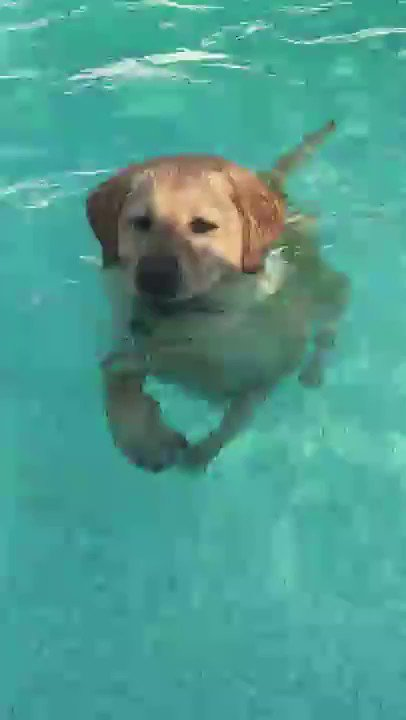

### Insight 2: **What is the correlation between favorite count and retweet count?**

In [374]:
# identify the highest rating
df_master.rating.max()

1.4

In [391]:
# query the tweets with the highest rating
# store in df_rating
df_rating = df_master.query('rating==1.4')
df_rating

,tweet_id,timestamp,text,expanded_urls,jpg_url,name,dog_breed,stage,rating,favorite_count,retweet_count
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Cassie,Pembroke,doggo,1.4,6264.0,28624.0
22,887517139158093824,2017-07-19 03:39:09+00:00,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,https://pbs.twimg.com/ext_tw_video_thumb/88751...,NaN,No Prediction,NaN,1.4,10097.0,41697.0
38,884441805382717440,2017-07-10 15:58:53+00:00,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,NaN,Pembroke,NaN,1.4,4907.0,24416.0
51,881536004380872706,2017-07-02 15:32:16+00:00,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,https://pbs.twimg.com/ext_tw_video_thumb/88153...,NaN,Samoyed,pupper,1.4,13773.0,44490.0
66,878057613040115712,2017-06-23 01:10:23+00:00,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,Emmy,French Bulldog,NaN,1.4,5886.0,37962.0
99,870063196459192321,2017-05-31 23:43:25+00:00,Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,Clifford,No Prediction,NaN,1.4,7260.0,33144.0
104,868880397819494401,2017-05-28 17:23:24+00:00,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,Walter,French Bulldog,NaN,1.4,12610.0,59350.0
118,864873206498414592,2017-05-17 16:00:15+00:00,We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,NaN,No Prediction,NaN,1.4,7685.0,29473.0
124,863079547188785154,2017-05-12 17:12:53+00:00,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,NaN,Lakeland Terrier,NaN,1.4,987.0,8069.0
138,860184849394610176,2017-05-04 17:30:24+00:00,Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,NaN,No Prediction,NaN,1.4,5242.0,15328.0


In [392]:
# create df_rating2 dataset with three columns
df_rating2 = df_rating[["rating", "retweet_count", "favorite_count"]]

In [393]:
df_rating2 = df_rating2.sort_values('favorite_count', ascending=False)
df_rating2

,rating,retweet_count,favorite_count
359,1.4,84590.0,35509.0
358,1.4,43997.0,18254.0
316,1.4,55225.0,16806.0
704,1.4,30557.0,14733.0
1359,1.4,31208.0,14587.0
51,1.4,44490.0,13773.0
335,1.4,26941.0,13573.0
393,1.4,35409.0,13419.0
104,1.4,59350.0,12610.0
22,1.4,41697.0,10097.0


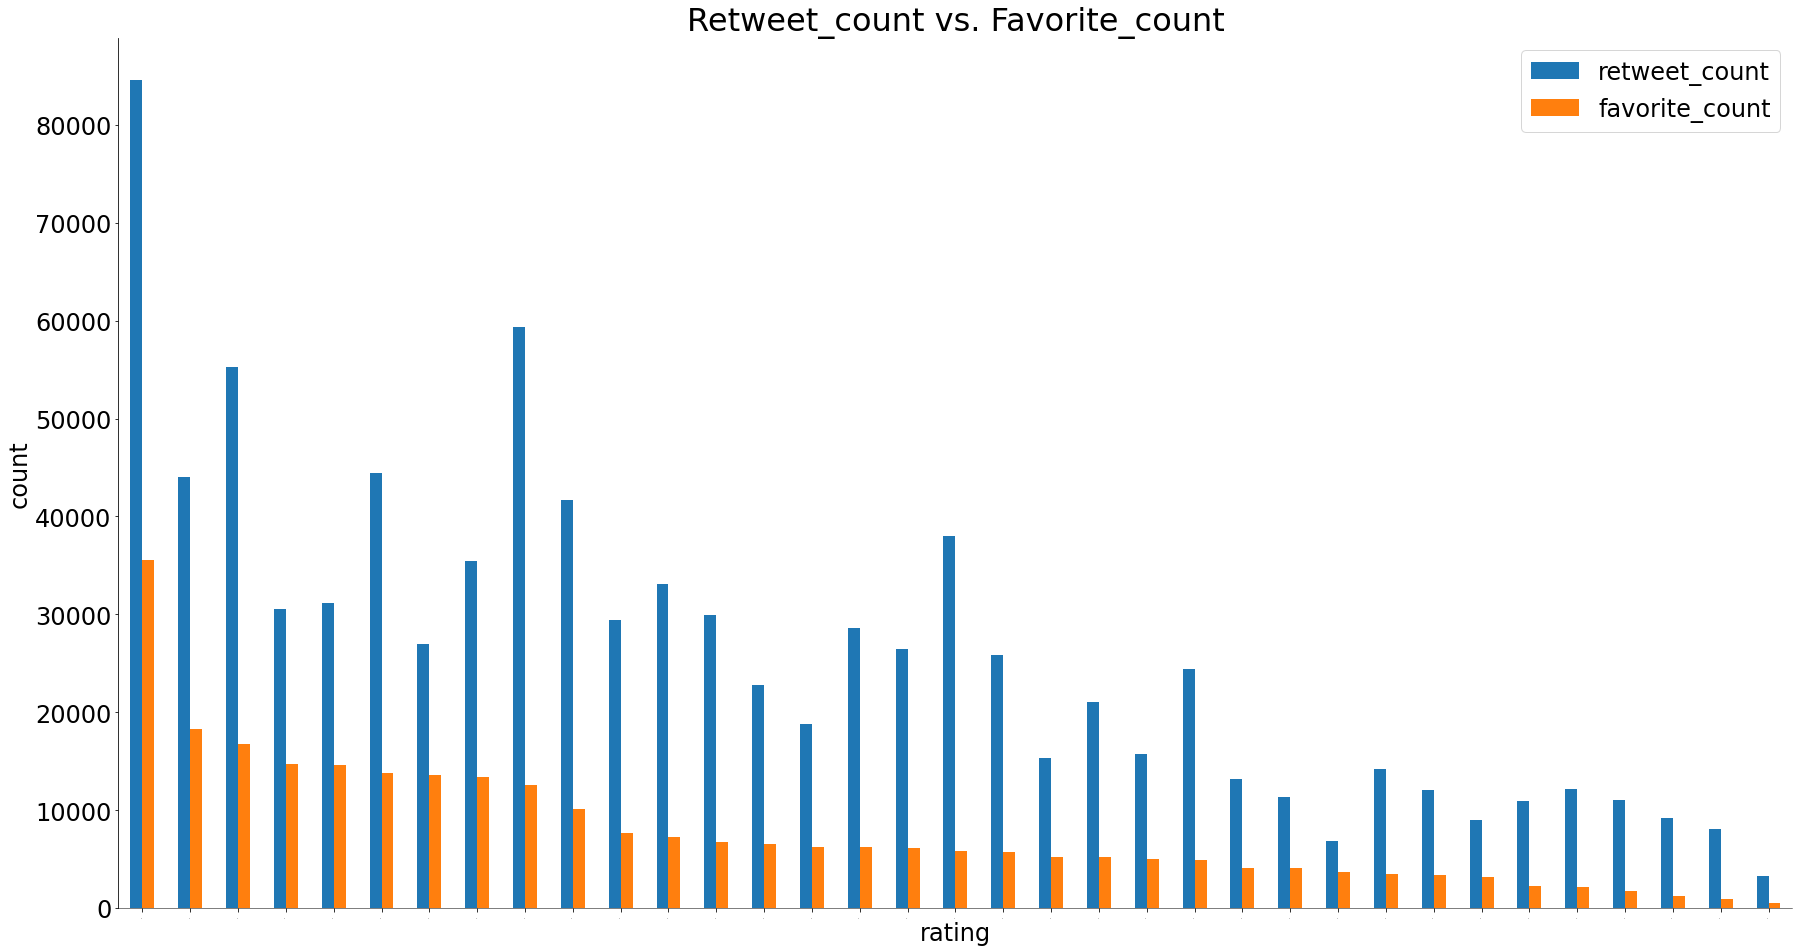

In [394]:
# plot the results in a bar graph 
ind = df_rating2.set_index('rating', inplace = True)
## modify the bar graph
bar = df_rating2.plot(kind='bar',figsize=(30, 16))
bar
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 0)
plt.xlabel("rating", fontsize = 24)
plt.ylabel("count", fontsize = 24)
plt.title("Retweet_count vs. Favorite_count", fontsize=32)
plt.legend(fontsize = 24)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

<br>To answer this question, first, we have identified the top most rating (1.4) that present in the dataset. In the next step, all the tweets are filtered for this 1.4 rating. With that filtered data, we investigated the relationship between the number of favorite count and retweet count.<br>
<br>For a specific rating, favorite count and retweet count values are found proportionate. That means, a higher number of retweets will usually generate a higher amount of likes.<br>

### Insight 3: **What are the top ten breeds of dogs?**

In [395]:
# top ten dog breeds by rating 
df_breed = df_master.groupby('dog_breed').rating.mean().sort_values(ascending=False).head(10)
df_breed

dog_breed
Bouvier Des Flandres    1.300000
Saluki                  1.250000
Briard                  1.233333
Tibetan Mastiff         1.225000
Border Terrier          1.214286
Silky Terrier           1.200000
Standard Schnauzer      1.200000
Gordon Setter           1.175000
Irish Setter            1.175000
Samoyed                 1.169048
Name: rating, dtype: float64

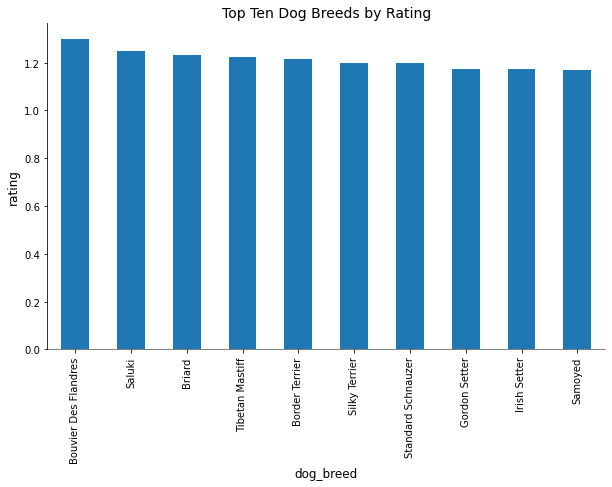

In [403]:
# display results in a bar graph 
## a modified bar graph
bar = df_breed.plot(kind='bar',figsize=(10,6))
bar
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel("dog_breed", fontsize = 12)
plt.ylabel("rating", fontsize = 12)
plt.title("Top Ten Dog Breeds by Rating", fontsize=14)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

<br>The top ten breeds of dogs are identified by rating and then, by favorite count. Mean values of rating and favorite count are used to generate this insight. The resuts are displayed in the following bar graphs.<br>
<br>Bouvier Des Flandres dogs have received the maximum rating(1.3), followed by Saluki (1.25) and Briard (1.23) in the second and third places, respectively.<br>

In [400]:
# top ten breeds by favorite count
df_breed2 = df_master.groupby('dog_breed').favorite_count.mean().sort_values(ascending=False).head(10)

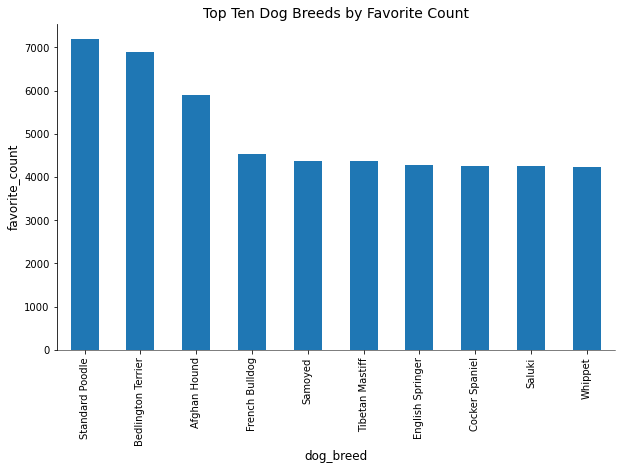

In [402]:
# visualize the results in a bar chart 
## a modified bar graph
bar = df_breed2.plot(kind='bar',figsize=(10,6))
bar
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel("dog_breed", fontsize = 12)
plt.ylabel("favorite_count", fontsize = 12)
plt.title("Top Ten Dog Breeds by Favorite Count", fontsize=14)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

<br>Standard Poodle breed dogs have received the most likes (7184). Bedlington Terrier and Afgan Hound breed are following with 6886 and 5895 counts, respectively.<br>
<br>Most interestingly, the top ten breeds determined by rating do not actually received so many likes, if we compare the results with the top ten breeds by favorite count. For instance, Bouvier Des Flandres, the highest rated breed is not seen in the top ten list by favorite count. <br>

<a id='reports'></a>
## Reporting

<br>Two reports are created in separate Jupyter Notebooks. One is wrangle_report, briefly describing the wrangling efforts of this project. This report is framed as an internal document. The second report is called act_report that communicates all the insights and displays the visualizations produced from the wrangled data. This is framed as an external document.<br>
<br>To read the reports, please check wrangle_report.html and act_report.html documents.<br>